# House Prices in US Affected by Supply&Demand Factors

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv("main_dataset.csv")

In [3]:
df.head()

,sr_no,date,target_home_price,population,monthly_supply_houses,new_permits_thousands,mortgage_rate,gdp_monthly,hcai,employment_percentage,ppi_const_goods,cci_real_estate,deliquency_rate,m3_trillion
0,1,01-01-00,100.552,281083,4.3,1727,8.15,101.488,17.087,74.248,142.4,103.091,1.48,4.6669
1,2,01-02-00,101.339,281299,4.3,1692,8.25,101.547,17.087,74.270,142.7,103.151,1.48,4.6801
2,3,01-03-00,102.127,281531,4.3,1651,8.27,101.620,17.087,74.227,143.2,103.059,1.48,4.7108
3,4,01-04-00,102.922,281763,4.4,1597,8.23,101.690,16.594,74.505,143.2,103.038,1.44,4.7668
4,5,01-05-00,103.677,281996,4.4,1543,8.13,101.731,16.594,74.089,142.2,103.009,1.44,4.7546


## Exploratory Data Analysis

In [4]:
data = df.drop(columns=["sr_no","date"],axis=1)
import warnings
warnings.filterwarnings("ignore")
profile = ProfileReport(data, title="Profile Report")
profile.to_file("profile_report.html")


Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature Scaling - Normalization


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
n_data=pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index) 
n_data

,target_home_price,population,monthly_supply_houses,new_permits_thousands,mortgage_rate,gdp_monthly,hcai,employment_percentage,ppi_const_goods,cci_real_estate,deliquency_rate,m3_trillion
0,0.000000,0.000000,0.091954,0.693714,0.911488,0.970310,0.759407,0.981921,0.022886,0.991418,0.097087,0.000000
1,0.005704,0.004330,0.091954,0.673714,0.930320,0.975683,0.759407,0.983468,0.025871,1.000000,0.097087,0.000896
2,0.011415,0.008981,0.091954,0.650286,0.934087,0.982332,0.759407,0.980443,0.030846,0.986840,0.097087,0.002980
3,0.017177,0.013631,0.103448,0.619429,0.926554,0.988707,0.734100,1.000000,0.030846,0.983836,0.092233,0.006782
4,0.022649,0.018302,0.103448,0.588571,0.907721,0.992441,0.734100,0.970735,0.020896,0.979688,0.092233,0.005954
...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.908855,0.991320,0.000000,0.614857,0.214689,0.465847,0.020276,0.469152,0.913433,0.387212,0.038835,0.946265
249,0.934134,0.994467,0.000000,0.618286,0.207156,0.477869,0.023151,0.530918,0.912438,0.411100,0.054612,0.956183
250,0.957428,0.997214,0.057471,0.676000,0.207156,0.489617,0.023151,0.533873,0.901493,0.404234,0.054612,0.970379
251,0.978642,0.999118,0.034483,0.711429,0.145009,0.511566,0.023151,0.544144,0.937313,0.404663,0.054612,0.982002


## Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(n_data.drop(columns="target_home_price", axis=1), n_data["target_home_price"], 
                                                    test_size= 0.30, random_state=42)

## Evaluating Regression Models

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

# define model
model_1 = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_1, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)

print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Mean MAE: 0.183 (0.032)


In [9]:
from sklearn.linear_model import Ridge
model_2 = Ridge(alpha=1.0)

# evaluate model
scores = cross_val_score(model_2, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.039 (0.007)


In [10]:
from sklearn.linear_model import BayesianRidge
model_3 = BayesianRidge()

# evaluate model
scores = cross_val_score(model_3, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Mean MAE: 0.026 (0.006)


In [11]:
from sklearn.linear_model import LinearRegression
model_4 = LinearRegression()

# evaluate model
scores = cross_val_score(model_4, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Mean MAE: 0.027 (0.006)


In [12]:
from sklearn.linear_model import ElasticNet
model_5 = ElasticNet()

# evaluate model
scores = cross_val_score(model_5, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Mean MAE: 0.183 (0.032)


BayesianRidge is selected to fit the model.

## Hyperparameter Selection

In [16]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(BayesianRidge(),{
    'alpha_1':list(range(0,10,1)),
    'alpha_2':list(range(0,10,1)),
    'lambda_1':list(range(0,10,1)),
    'lambda_2':list(range(0,10,1))

}, cv=5, return_train_score=False )

clf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=BayesianRidge(),
             param_grid={'alpha_1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'alpha_2': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'lambda_1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'lambda_2': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [17]:
df = pd.DataFrame(clf.cv_results_)

In [18]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha_1,param_alpha_2,param_lambda_1,param_lambda_2,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007997,0.005054,0.004801,0.003920,0,0,0,0,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.976379,0.979994,0.972724,0.977950,0.964444,0.974298,0.005472,524
1,0.002844,0.003529,0.000000,0.000000,0,0,0,1,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.976035,0.980123,0.972425,0.977922,0.964544,0.974210,0.005453,1044
2,0.000000,0.000000,0.000000,0.000000,0,0,0,2,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.975921,0.980151,0.972336,0.977900,0.964567,0.974175,0.005447,1312
3,0.003127,0.006253,0.003126,0.006252,0,0,0,3,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.975865,0.980163,0.972293,0.977888,0.964577,0.974157,0.005443,1533
4,0.006252,0.007657,0.000000,0.000000,0,0,0,4,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.975830,0.980170,0.972267,0.977880,0.964583,0.974146,0.005441,1709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.003126,0.006252,0.003126,0.006252,9,9,9,5,"{'alpha_1': 9, 'alpha_2': 9, 'lambda_1': 9, 'l...",0.970462,0.972322,0.969194,0.971611,0.955810,0.967880,0.006127,8010
9996,0.005348,0.004479,0.000000,0.000000,9,9,9,6,"{'alpha_1': 9, 'alpha_2': 9, 'lambda_1': 9, 'l...",0.971806,0.973555,0.970020,0.972427,0.957133,0.968988,0.006037,7658
9997,0.003201,0.003921,0.001600,0.003200,9,9,9,7,"{'alpha_1': 9, 'alpha_2': 9, 'lambda_1': 9, 'l...",0.972758,0.974440,0.970621,0.973054,0.958111,0.969797,0.005970,7301
9998,0.004725,0.006269,0.001614,0.003229,9,9,9,8,"{'alpha_1': 9, 'alpha_2': 9, 'lambda_1': 9, 'l...",0.973465,0.975109,0.971078,0.973558,0.958867,0.970416,0.005916,6953


In [19]:
 print(np.max(df["mean_test_score"]))

0.9743315770691534


In [20]:
for i in range(1000):
    if df["mean_test_score"][i]== np.max(df["mean_test_score"]):
        print("score: {}, row no. : {}".format(np.max(df["mean_test_score"]), i))
        

score: 0.9743315770691534, row no. : 149


In [21]:
print('''Hyper Parameters are:
            alpha_1: {}
            alpha_2: {}
            
            lambda_1: {}
            lambda_2: {}'''.format(df["param_alpha_1"][149], df["param_alpha_2"][149], df["param_lambda_1"][i], df["param_lambda_2"][i]))

Hyper Parameters are:
            alpha_1: 0
            alpha_2: 1
            
            lambda_1: 9
            lambda_2: 9


## Model Fitting

In [116]:
# Model Defining and Fitting
model_br= BayesianRidge(alpha_1=0, alpha_2=1, lambda_1=9, lambda_2=9)
fit_data = model_br.fit(X_train, y_train)


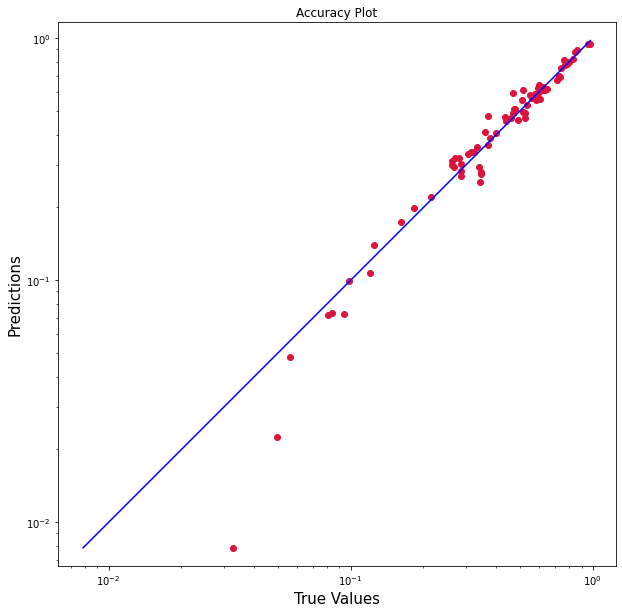

In [138]:
# Prediction

prediction = fit_data.predict(X_test)

# Plotting both the curves simultaneously
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Accuracy Plot")
plt.axis('equal')
plt.show()


## Bias-Variance Check

In [118]:
from mlxtend.evaluate import bias_variance_decomp
X_tr = X_train.to_numpy(dtype ='float32')
X_tst = X_test.to_numpy(dtype ='float32')
y_tr = y_train.to_numpy(dtype ='float32')
y_tst = y_test.to_numpy(dtype ='float32')

mse, bias, variance = bias_variance_decomp(model_br, X_tr, y_tr, X_tst, y_tst, 
                                           loss='mse', num_rounds=200, random_seed=123)
print("Average Bias : ", bias)
print("Average Variance : ", variance)

Average Bias :  0.0010747944409308903
Average Variance :  0.00012950546109051045


## Error Analyisis

In [139]:
from sklearn.metrics import mean_squared_error, r2_score
rmse=np.sqrt(mean_squared_error(y_test, prediction))
print(rmse)
r2_score(y_test, prediction)


0.03715250240585421


0.9735937201381715

## OLS 

In [128]:
result = sm.OLS(y_train, X_train).fit()

In [130]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:      target_home_price   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              1804.
Date:                Thu, 09 Sep 2021   Prob (F-statistic):                   1.67e-166
Time:                        23:25:52   Log-Likelihood:                          298.56
No. Observations:                 177   AIC:                                     -575.1
Df Residuals:                     166   BIC:                                     -540.2
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

## Conclusion

Prediction Model: Bayesian Regression Model - as it shows the least error and better accuracy among other regression models.

OLS Analysis shows that monthly GDP, morgage rate and cci rate does not impact much on the house prices as per the collected data.
This analysis has a loophole of collection of data(i.e. each individual column field of data was collected separately); 
it might induce uncertainity in data relevancy because each data can be scaled differently on the basis of owner's convenience. 

As far as accuracy is concerned, this model has performance parameter of 97.8%.


In [157]:
# Extras
df.to_hdf("hdf_dataset.h5", key='h')